# Versuch 241 - Wechselstromeigenschaften von RCL-Gliedern

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as scp
import matplotlib.mlab as mlab
from scipy import signal
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import uncertainties as unc
import uncertainties.unumpy as unumpy
from uncertainties import umath
from uncertainties import ufloat
from tabulate import tabulate
from scipy.integrate import quad
%matplotlib inline

## Aufgabe 1

### Werte berechnen:

In [2]:
f_1 = 100 #[Hz]

C1 = np.array([470, 4.7, 47]) * 10**-9
R1 = np.array([1, 10, 1]) * 10**3

C_1 = unumpy.uarray(C1, C1*0.1) #[F]
R_1 = unumpy.uarray(R1, R1*0.05) #[Ohm]

T_halb_1 = unumpy.uarray([360, 37.6, 34.8], [20, 2, 2]) * 10**-6 #[s]

In [3]:
tau_1_exp = T_halb_1/np.log(2)

tau_1_theo = R_1 * C_1

### Signifikanztest:

In [4]:
sigma_tau_1 = abs(unumpy.nominal_values(tau_1_exp) - unumpy.nominal_values(tau_1_theo)) \
                /np.sqrt(unumpy.std_devs(tau_1_exp)**2 + unumpy.std_devs(tau_1_theo)**2)

### Tabelle:

In [5]:
print(tabulate(np.array([C_1*10**9, R_1*10**-3, tau_1_exp*10**6, tau_1_theo*10**6, sigma_tau_1]).T, tablefmt='latex', \
              headers=['C [nF]', 'R [kOhm]', 'tau_exp [mus]', 'tau_theo [mus]', 'sigma_tau'],))

\begin{tabular}{llllr}
\hline
 C [nF]          & R [kOhm]    & tau\_exp [mus]   & tau\_theo [mus]   &   sigma\_tau \\
\hline
 (4.7+/-0.5)e+02 & 1.00+/-0.05 & 519+/-29        & (4.7+/-0.5)e+02  &    0.823547 \\
 4.7+/-0.5       & 10.0+/-0.5  & 54.2+/-2.9      & 47+/-5           &    1.2086   \\
 47+/-5          & 1.00+/-0.05 & 50.2+/-2.9      & 47+/-5           &    0.534759 \\
\hline
\end{tabular}


### Vergleich Messprotokoll:

In [6]:
T_C = ufloat(34.8, 2) * 10**-6 #[s]
T_R = ufloat(35, 2) * 10**-6 #[s]

sigma_T_1 = abs(T_C.n - T_R.n)/np.sqrt(T_C.s**2 + T_C.s**2)

In [7]:
print('sigma_T = {:.1}'.format(sigma_T_1))

sigma_T = 0.07


---
---

## Aufgabe 3

### Tiefpass:

In [8]:
f_t, Vrms_t, dBV_t = np.loadtxt('Messung3_Tiefpass.txt', unpack=True, skiprows=1)
f_h, Vrms_h, dBV_h = np.loadtxt('Messung3_Hochpass.txt', unpack=True, skiprows=1)

In [9]:
def linear_func(x, a, b):
    return a*np.log(x) + b

def const_func(x, c):
    return x*0 + c

In [10]:
popt_t1, pcov_t1 = curve_fit(const_func, f_t[:30], dBV_t[:30])

c_t1 = ufloat(popt_t1[0], np.sqrt(pcov_t1[0][0]))

popt_t2, pcov_t2 = curve_fit(linear_func, f_t[81:114], dBV_t[81:114])

a_t2 = ufloat(popt_t2[0], np.sqrt(pcov_t2[0][0]))
b_t2 = ufloat(popt_t2[1], np.sqrt(pcov_t2[1][1]))

In [11]:
fg_t = umath.exp((c_t1 - b_t2)/a_t2)
print('fg_t = ({:P}) kHz'.format(fg_t*10**-3))

fg_t = (2.97±0.12) kHz


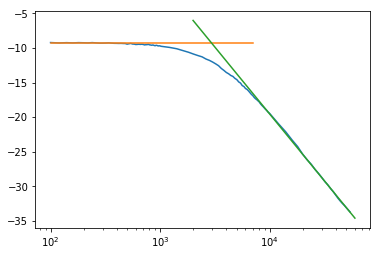

In [12]:
plt.semilogx(f_t[:114], dBV_t[:114])


x_t = np.linspace(100,7000)
plt.plot(x_t, const_func(x_t, *popt_t1))

x_t2 = np.linspace(2000,60000)
plt.plot(x_t2, linear_func(x_t2, *popt_t2))

### Hochpass:

In [13]:
popt_h1, pcov_h1 = curve_fit(const_func, f_h[96:], dBV_h[96:])

c_h1 = ufloat(popt_h1[0], np.sqrt(pcov_h1[0][0]))

popt_h2, pcov_h2 = curve_fit(linear_func, f_h[:51], dBV_h[:51])

a_h2 = ufloat(popt_h2[0], np.sqrt(pcov_h2[0][0]))
b_h2 = ufloat(popt_h2[1], np.sqrt(pcov_h2[1][1]))

In [14]:
fg_h = umath.exp((c_h1 - b_h2)/a_h2)
print('fg_h = ({:P}) kHz'.format(fg_h*10**-3))

fg_h = (3.49±0.12) kHz


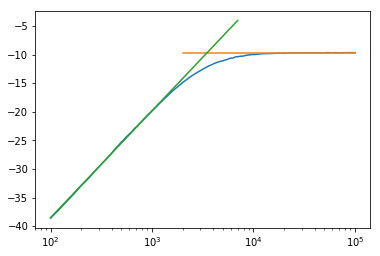

In [15]:
plt.semilogx(f_h, dBV_h)

x_h = np.linspace(2000,100000)
plt.plot(x_h, const_func(x_h, *popt_h1))

x_h2 = np.linspace(100,7000)
plt.plot(x_h2, linear_func(x_h2, *popt_h2))

### Phasenverschiebung:

In [16]:
f_3 = np.arange(1,11)

dt_3 = unumpy.uarray([210, 90, 53, 29, 21, 14.8, 10.8, 9.6, 7.4, 5.2], \
                     [10, 5, 2, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5])

phi_3 = unumpy.uarray([76, 65, 57.2, 41.8, 37.8, 32, 27.2, 27.6, 24, 18.72], \
                     [4, 4, 2.2, 1.4, 1.8, 1.1, 1.3, 1.4, 1.6, 1.8])

In [17]:
popt_3, pcov_3 = curve_fit(linear_func, f_3, unumpy.nominal_values(phi_3), sigma=unumpy.std_devs(phi_3))

a_3 = ufloat(popt_3[0], np.sqrt(pcov_3[0][0]))
b_3 = ufloat(popt_3[1], np.sqrt(pcov_3[1][1]))

In [18]:
fg_phi = umath.exp((45 - b_3)/a_3) * 10**3
print('fg_phi = ({:P}) kHz'.format(fg_phi*10**-3))

fg_phi = (3.8±0.6) kHz


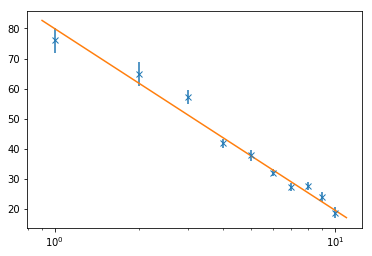

In [43]:
plt.errorbar(f_3, unumpy.nominal_values(phi_3), yerr=unumpy.std_devs(phi_3), ls='None', marker='x')

plt.xscale('log')

x_3 = np.linspace(0.9, 11)

plt.semilogx(x_3, linear_func(x_3, *popt_3))

### Vergleich Frequenzgang-Phasenverschiebung:

In [20]:
def sigma_func(x1,x2):
    return abs(unumpy.nominal_values(x1)-unumpy.nominal_values(x2)) \
            /np.sqrt(unumpy.std_devs(x1)**2 + unumpy.std_devs(x2)**2)

In [21]:
sigma_phi_arr = np.array([sigma_func(fg_phi, fg_t), sigma_func(fg_phi, fg_h)])

In [22]:
sigma_phi_arr

array([1.37552987, 0.5018884 ])

### Messwerte:

In [23]:
fg_t_mess = ufloat(2.99, 0.1) * 10**3 #[Hz]
fg_h_mess = ufloat(3.12, 0.1) * 10**3 #[Hz]

### Theoretischer Wert:

In [24]:
R_3 = ufloat(1, 0.05*1) * 10**3 #[Ohm]
C_3 = ufloat(47, 0.1*47) * 10**-9 #[F]

fg_theo = 1 / (2*np.pi * (R_3 * C_3))
print('fg_theo = ({:P}) kHz'.format(fg_theo*10**-3))

fg_theo = (3.4±0.4) kHz


### Signifikanztest:

In [25]:
fg_arr = np.array([fg_theo, fg_t, fg_t_mess, fg_h, fg_h_mess, fg_phi]) * 10**-3

sigma_arr = sigma_func(np.repeat(fg_theo*10**-3,6),fg_arr)

text_fg_arr = np.array(['Theorie', 'Tiefpass (graphisch)', 'Tiefpass (Messung)', 'Hochpass (graphisch)', \
                        'Hochpass (Messung)', 'Phasenverschiebung'])

In [26]:
print(tabulate(np.array([text_fg_arr, fg_arr, sigma_arr]).T, tablefmt='latex', \
              headers=['', 'fg [kHz]', 'sigma']))

\begin{tabular}{llr}
\hline
                      & fg [kHz]    &    sigma \\
\hline
 Theorie              & 3.4+/-0.4   & 0        \\
 Tiefpass (graphisch) & 2.97+/-0.12 & 1.05375  \\
 Tiefpass (Messung)   & 2.99+/-0.10 & 1.01199  \\
 Hochpass (graphisch) & 3.49+/-0.12 & 0.258729 \\
 Hochpass (Messung)   & 3.12+/-0.10 & 0.680001 \\
 Phasenverschiebung   & 3.8+/-0.6   & 0.578897 \\
\hline
\end{tabular}


### Aufgabe 4

### Messwerte:

In [27]:
C_4 = ufloat(47, 0.1*47) * 10**-9 #[F]

R_4 = unumpy.uarray([1000, 220, 47], [0.05*1000, 0.05*220, 0.05*47]) #[Ohm]

f_R_4 = unumpy.uarray([4.15, 4.04, 3.96], [0.05, 0.05, 0.05]) * 10**3 #[Hz]
df_4 = unumpy.uarray([5.35, 1.49, 0.7], [0.07, 0.07, 0.07]) * 10**3 #[Hz]

Ua_eff_4 = unumpy.uarray([0.32, 0.25, 0.12], 0.01) #[V]
Ue_eff_4 = unumpy.uarray([0.33, 0.29, 0.23], 0.01) #[V]

### Induktivität:

In [28]:
L_4_arr = 1/((2*np.pi*f_R_4)**2 * C_4)
L_4_arr

array([0.03129292879562477+/-0.003218860049079653,
       0.033020198153529544+/-0.0034016710403245182,
       0.03436782383064532+/-0.003544669098394257], dtype=object)

In [29]:
L_4 = ufloat(np.mean(unumpy.nominal_values(L_4_arr)), \
            np.sqrt(np.std(unumpy.nominal_values(L_4_arr)/np.sqrt(2))**2 + np.sum(unumpy.std_devs(L_4_arr)**2/3)))

In [30]:
L_4

0.03289365025993321+/-0.0035058456205497445

### Verlustwiderstände:

In [31]:
R_ges_4 = 2*np.pi * df_4 * L_4
R_ges_4

array([1105.7214150680322+/-118.73384648952681,
       307.9485810189473+/-35.868628520249295,
       144.6738300089014+/-21.14394936503505], dtype=object)

In [32]:
R_V_4 = R_ges_4 - R_4
R_V_4

array([105.72141506803223+/-128.8321633063674,
       87.94858101894732+/-37.51744276897936,
       97.6738300089014+/-21.274141457439967], dtype=object)

### Signifikanztest:

In [33]:
R_V_42 = R_4 * (Ue_eff_4/Ua_eff_4 - 1)
R_V_42

array([31.25+/-44.91720424087419, 35.19999999999998+/-13.591941141720708,
       43.083333333333336+/-8.736986133532024], dtype=object)

In [34]:
sigma_RV_4 = sigma_func(R_V_4, R_V_42)
sigma_RV_4

array([0.54582673, 1.32189944, 2.37367032])

### Aufgabe 5

### Messwerte:

In [35]:
C_5 = ufloat(47, 0.1*47) * 10**-9 #[F]
R_5 = ufloat(220, 0.05*220) #[Ohm]

f_R5 = ufloat(4.06, 0.05) * 10**3 #[Hz]
f_C5 = ufloat(3.91, 0.05) * 10**3 #[Hz]
f_F5 = ufloat(4.21, 0.05) * 10**3 #[Hz]

In [36]:
L_5 = 1/ ((2*np.pi*w_R5)**2 * C_5)
L_5

NameError: name 'w_R5' is not defined

In [ ]:
sigma_L45 = sigma_func(L_4, L_5)
sigma_L45